In [4]:


from skimage.io import imread
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, rectangle

<Figure size 432x288 with 0 Axes>

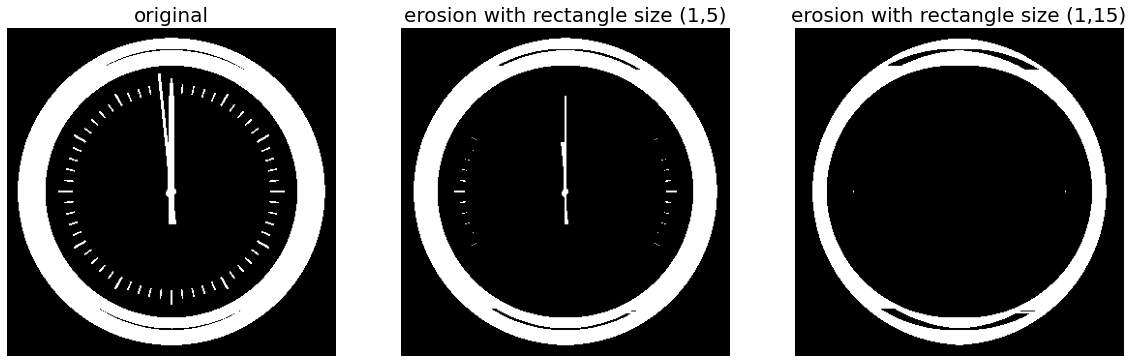

In [5]:


def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') 
    
im = rgb2gray(imread('images/clock2.jpg'))
im[im <= 0.5] = 0 
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_erosion(im, rectangle(1,5))
pylab.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size (1,5)')
im1 = binary_erosion(im, rectangle(1,15))
pylab.subplot(1,3,3), plot_image(im1, 'erosion with rectangle size (1,15)')
pylab.show()

<Figure size 432x288 with 0 Axes>

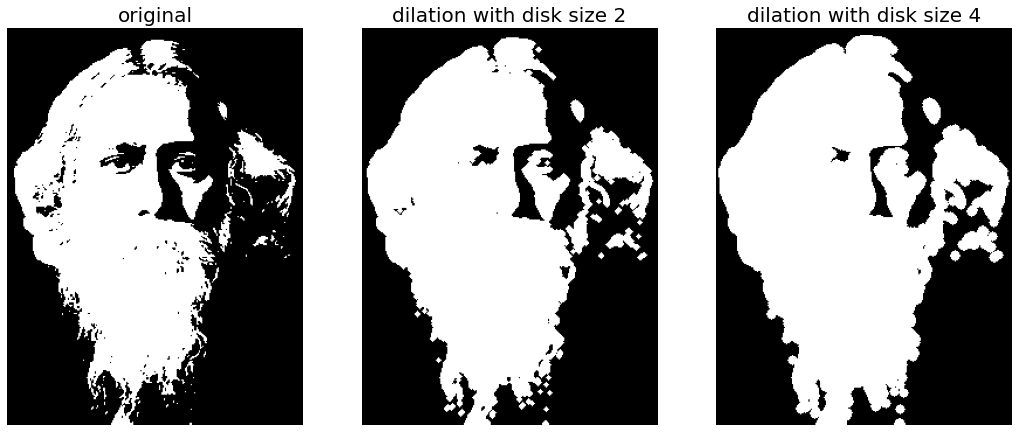

In [6]:

from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
im = img_as_float(imread('images/tagore.png'))
im = 1 - im[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.subplot(131)
pylab.imshow(im)
pylab.title('original', size=20)
pylab.axis('off')
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show()   

<Figure size 432x288 with 0 Axes>

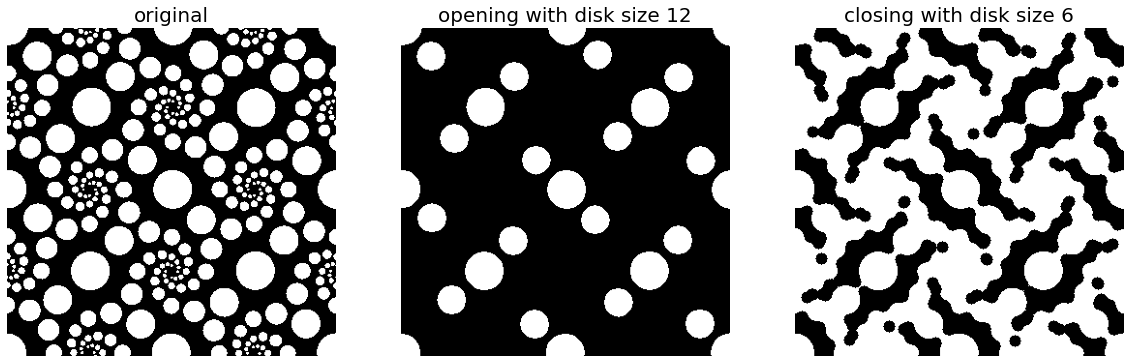

In [7]:

from skimage.morphology import binary_opening, binary_closing, binary_erosion, binary_dilation, disk
im = rgb2gray(imread('images/circles.jpg'))
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_opening(im, disk(12))
pylab.subplot(1,3,2), plot_image(im1, 'opening with disk size ' + str(12))
im1 = binary_closing(im, disk(6))
pylab.subplot(1,3,3), plot_image(im1, 'closing with disk size ' + str(6))
pylab.show()

<Figure size 432x288 with 0 Axes>

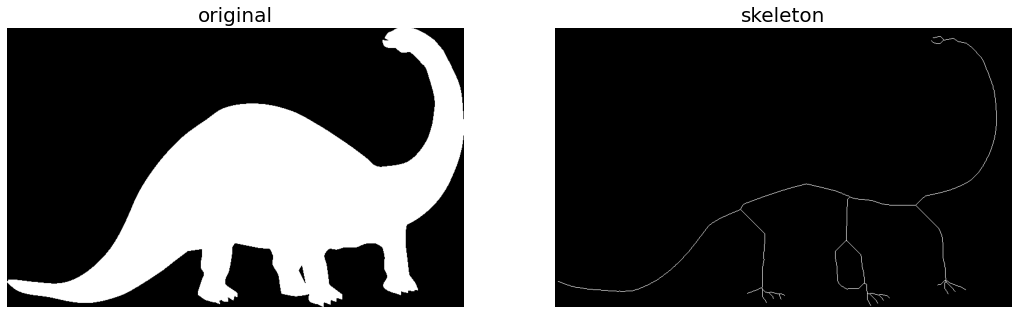

In [8]:

def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()

from skimage.morphology import skeletonize
im = img_as_float(imread('images/dynasaur.png')[...,3])
threshold = 0.5
im[im <= threshold] = 0
im[im > threshold] = 1
skeleton = skeletonize(im)
plot_images_horizontally(im, skeleton, 'skeleton',sz=(18,9))

<Figure size 432x288 with 0 Axes>

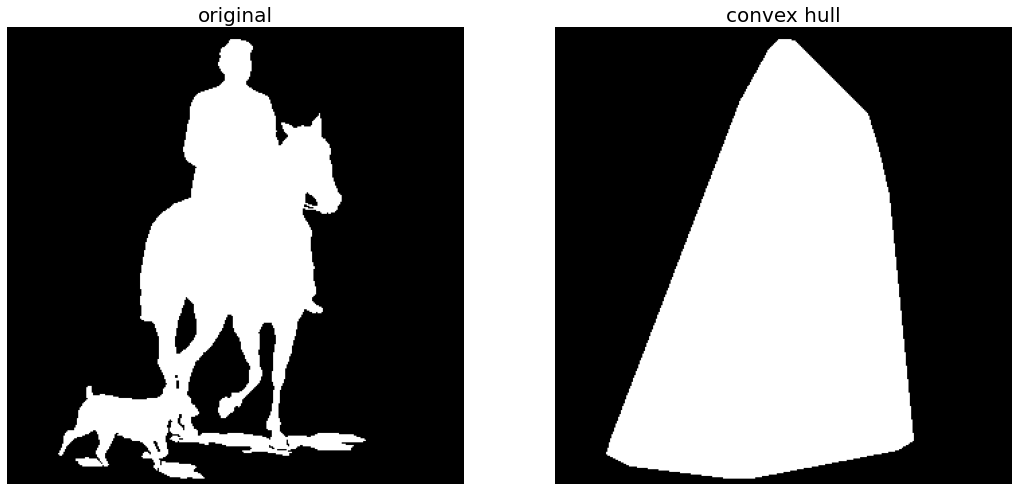

In [9]:

from skimage.morphology import convex_hull_image
im = rgb2gray(imread('images/horse-dog.jpg'))
threshold = 0.5
im[im < threshold] = 0 
im[im >= threshold] = 1
chull = convex_hull_image(im)
plot_images_horizontally(im, chull, 'convex hull', sz=(18,9))

C:\Users\DELL\AppData\Local\Temp/ipykernel_10608/2219651965.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = im.astype(np.bool)


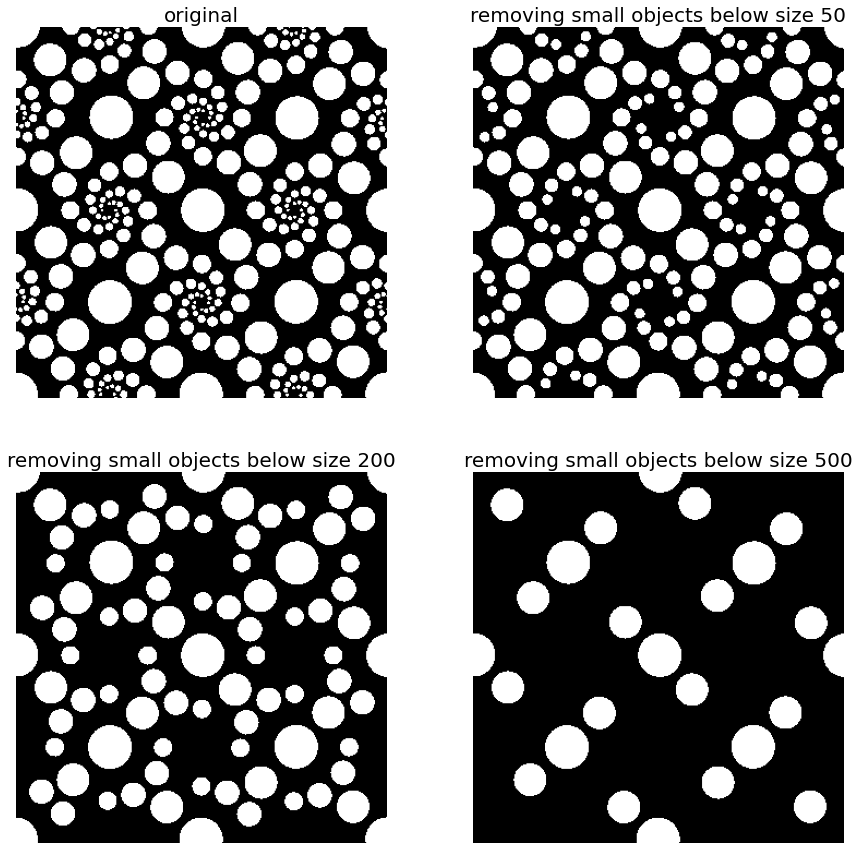

In [10]:

from skimage.morphology import remove_small_objects
im = rgb2gray(imread('images/circles.jpg'))
im[im > 0.5] = 1 
0.5
im[im <= 0.5] = 0
im = im.astype(np.bool)
pylab.figure(figsize=(15,15))
pylab.subplot(2,2,1), plot_image(im, 'original')
i = 2
for osz in [50, 200, 500]:
    im1 = remove_small_objects(im, osz, connectivity=1)
    pylab.subplot(2,2,i), plot_image(im1, 'removing small objects below size ' + str(osz))
    i += 1
pylab.show()

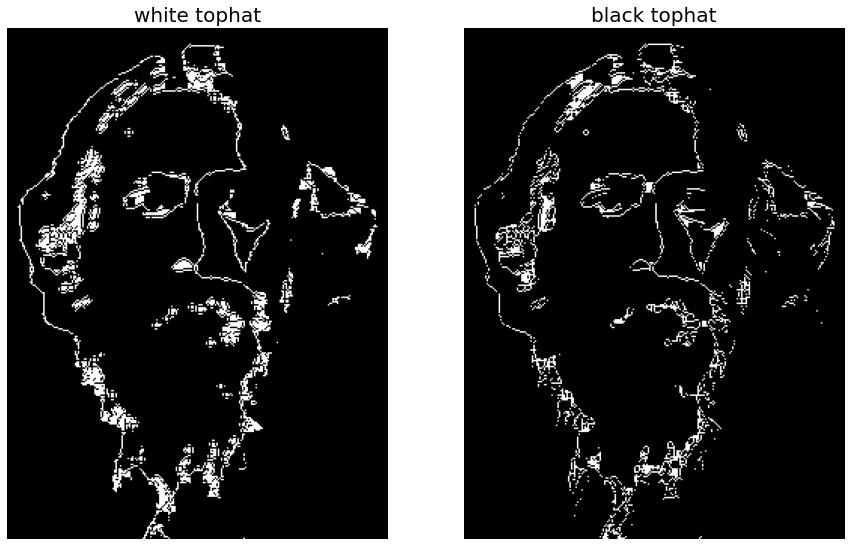

In [11]:

from skimage.morphology import white_tophat, black_tophat, square
im = imread('images/tagore.png')[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1
im1 = white_tophat(im, square(5))
im2 = black_tophat(im, square(5))
pylab.figure(figsize=(15,15))
pylab.subplot(1,2,1), plot_image(im1, 'white tophat')
pylab.subplot(1,2,2), plot_image(im2, 'black tophat')
pylab.show()

<Figure size 432x288 with 0 Axes>

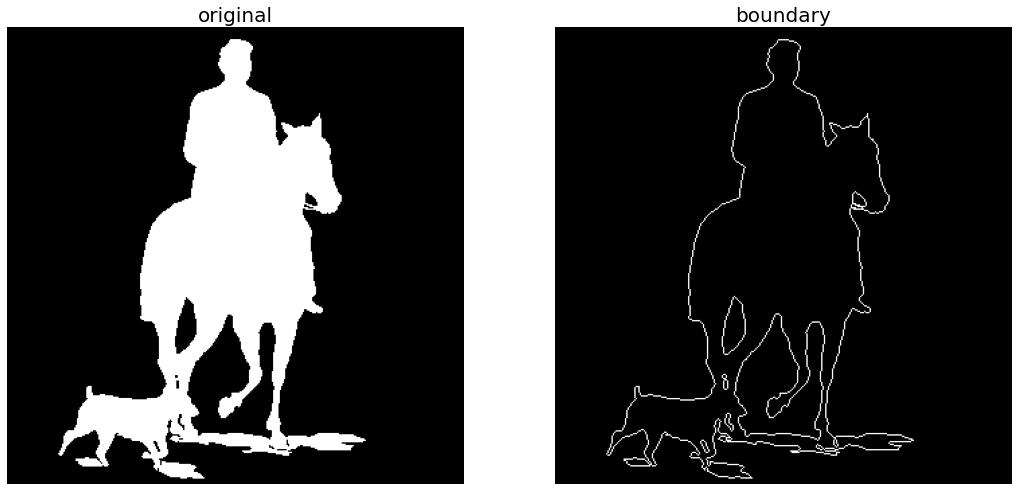

In [12]:

from skimage.morphology import binary_erosion
im = rgb2gray(imread('images/horse-dog.jpg'))
threshold = 0.5
im[im < threshold] = 0
im[im >= threshold] = 1
boundary = im - binary_erosion(im)
plot_images_horizontally(im, boundary, 'boundary',sz=(18,9))

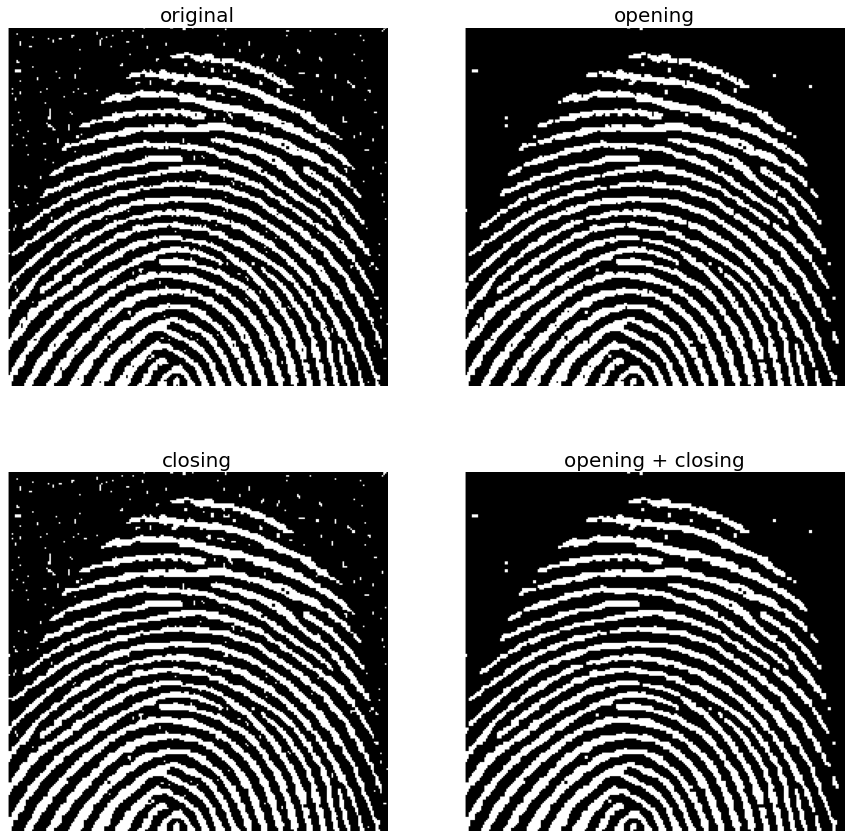

In [13]:

im = rgb2gray(imread('images/fingerprint.jpg'))
im[im <= 0.5] = 0 
im[im > 0.5] = 1
im_o = binary_opening(im, square(2))
im_c = binary_closing(im, square(2))
im_oc = binary_closing(binary_opening(im, square(2)), square(2))
pylab.figure(figsize=(15,15))
pylab.subplot(221), plot_image(im, 'original')
pylab.subplot(222), plot_image(im_o, 'opening')
pylab.subplot(223), plot_image(im_c, 'closing')
pylab.subplot(224), plot_image(im_oc, 'opening + closing')
pylab.show()

<Figure size 432x288 with 0 Axes>

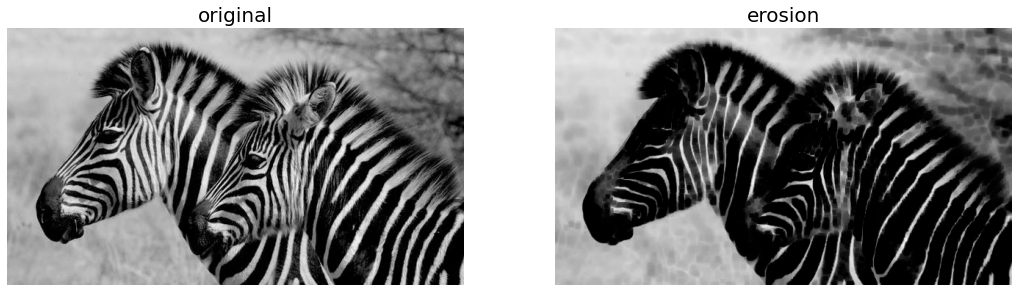

In [14]:

from skimage.morphology import dilation, erosion, closing, opening, square
im = imread('images/zebras.jpg')
im = rgb2gray(im)
struct_elem = square(5)
eroded = erosion(im, struct_elem)
plot_images_horizontally(im, eroded, 'erosion')

<Figure size 432x288 with 0 Axes>

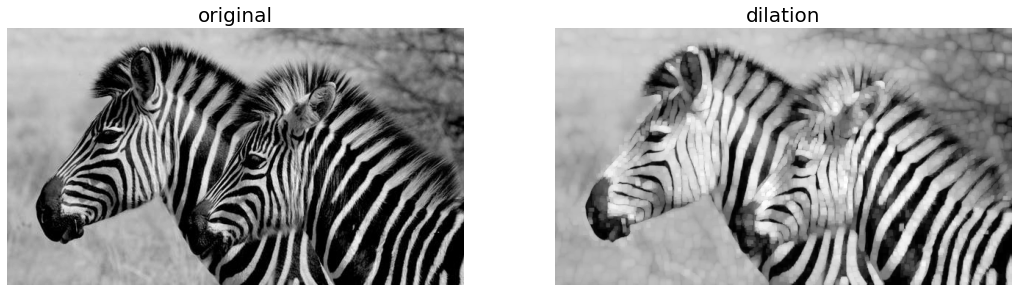

In [15]:
dilated = dilation(im, struct_elem)
plot_images_horizontally(im, dilated, 'dilation')

<Figure size 432x288 with 0 Axes>

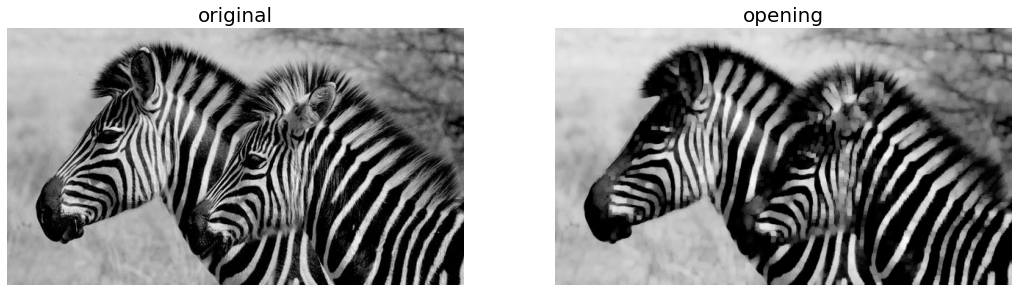

In [16]:
opened = opening(im, struct_elem)
plot_images_horizontally(im, opened, 'opening')

<Figure size 432x288 with 0 Axes>

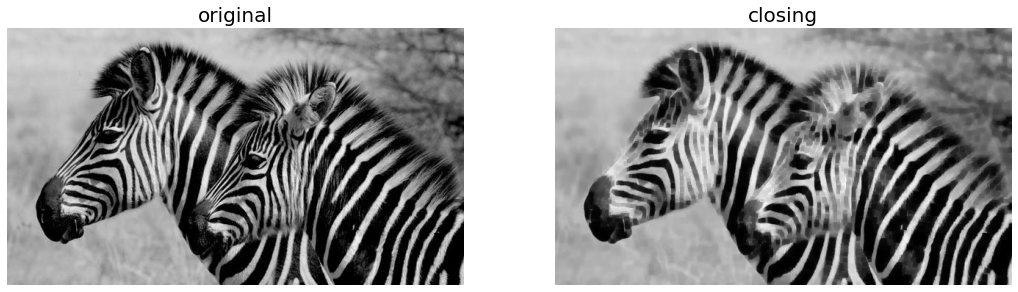

In [17]:
closed = closing(im, struct_elem)
plot_images_horizontally(im, closed, 'closing')

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


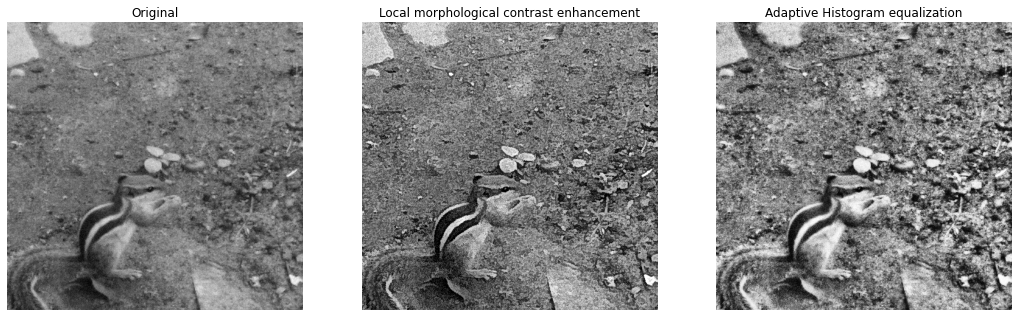

In [18]:


from skimage.filters.rank import enhance_contrast
from skimage import exposure
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap=pylab.cm.gray),
    ax.set_title(title), ax.axis('off')
    ax.set_adjustable('box')
    
image = rgb2gray(imread('images/squirrel.jpg'))
sigma = 0.05
noisy_image = np.clip(image + sigma * np.random.standard_normal(image.shape), 0, 1)
enhanced_image = enhance_contrast(noisy_image, disk(5))
equalized_image = exposure.equalize_adapthist(noisy_image)

fig, axes = pylab.subplots(1, 3, figsize=[18, 7], sharex='row',sharey='row')
axes1, axes2, axes3 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Original')
plot_gray_image(axes2, enhanced_image, 'Local morphological contrast enhancement')
plot_gray_image(axes3, equalized_image, 'Adaptive Histogram equalization')

C:\Users\DELL\AppData\Local\Temp/ipykernel_10608/367457042.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im = rgb2gray(imread('images/text1.png'))


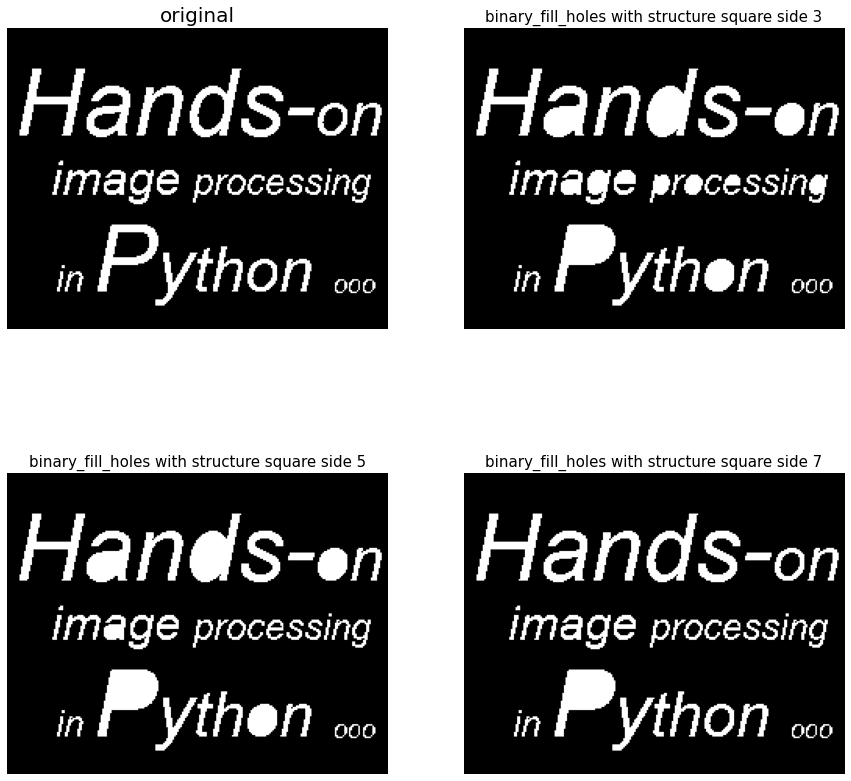

In [19]:

from scipy.ndimage.morphology import binary_fill_holes
im = rgb2gray(imread('images/text1.png'))
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.figure(figsize=(15,15))
pylab.subplot(221), pylab.imshow(im), pylab.title('original', size=20),pylab.axis('off')
i = 2
for n in [3,5,7]:
    pylab.subplot(2, 2, i)
    im1 = binary_fill_holes(im, structure=np.ones((n,n)))
    pylab.imshow(im1), pylab.title('binary_fill_holes with structure square side ' + str(n), size=15)
    pylab.axis('off')
    i += 1
pylab.show()

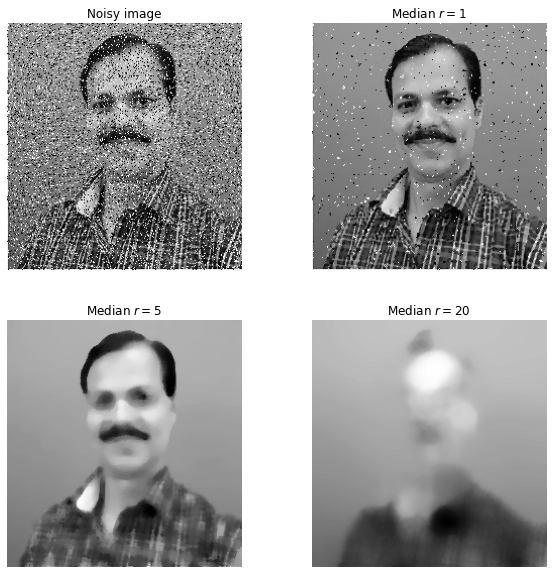

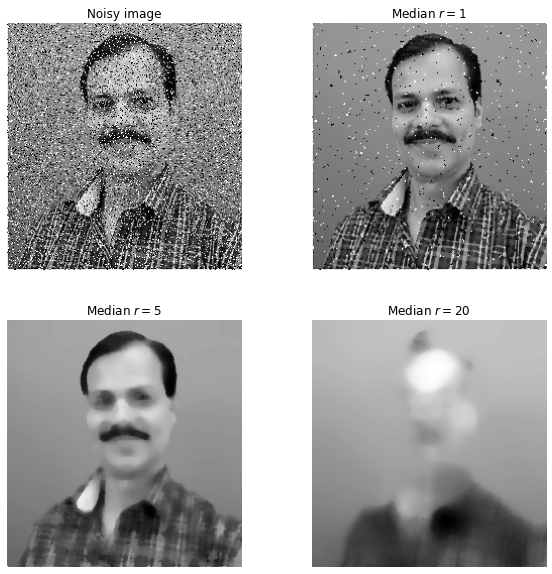

In [20]:

from skimage.filters.rank import median
from skimage.morphology import disk
noisy_image = (rgb2gray(imread('images/rkm.jpg'))*255).astype(np.uint8)
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.9] = 255
noisy_image[noise < 0.1] = 0
fig, axes = pylab.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, median(noisy_image, disk(1)), 'Median $r=1$')
plot_gray_image(axes3, median(noisy_image, disk(5)), 'Median $r=5$')
plot_gray_image(axes4, median(noisy_image, disk(20)), 'Median $r=20$')
from skimage.filters.rank import median
from skimage.morphology import disk
noisy_image = (rgb2gray(imread('images/rkm.jpg'))*255).astype(np.uint8)
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.9] = 255
noisy_image[noise < 0.1] = 0
fig, axes = pylab.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, median(noisy_image, disk(1)), 'Median $r=1$')
plot_gray_image(axes3, median(noisy_image, disk(5)), 'Median $r=5$')
plot_gray_image(axes4, median(noisy_image, disk(20)), 'Median $r=20$')